# Stage One: Import at least three documents you would like to compare (from text files, or using another format for a challenge.)

1. Used The Gutenburg project to collect txt files
2. Decided on Fairy tales : Japanese, Russian, and American.
3. After saving the .txt files, I imported them into this notebook.

In [9]:
import nltk
import nltk.tokenize

# download the most recent punkt package
nltk.download('punkt', quiet=True)

corpus = ["american_fairytales.txt","japanese_fairytales.txt","russian_fairytales.txt"]
titles = ["American", "Japanese", "Russian"]
documents = []
for url in corpus:
    f = open(url, encoding='utf-8')
    text = f.read()
    documents.append(text)
print(documents[1][0:100])

The Project Gutenberg EBook of Japanese Fairy Tales, by Yei Theodora Ozaki

This eBook is for the u


# Step Two: Preprocess the text and create a tokenized corpus from the text of the imported documents.

1. Dealt with punctuation 
2. coverted to lowercase and tokenized 
3. test

In [10]:
#punctuation
import re


PUNCT_RE = re.compile(r'[^\w\s]+$')


def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    """
    return PUNCT_RE.match(string) is not None

In [11]:
#covert to lowercase

def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

In [12]:
#test

tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))

print(tokenized[0][25])

with


# Step Three: Create a document term matrix to enable comparative textual analysis across the full set of documents
   
1. Basically making a searchable vocabulary

In [13]:
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)
import collections
vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])

["'as", "'as-is", "'complete", "'crack", "'d", "'em", "'get", "'god", "'if", "'let", "'ll", "'m", "'maiden", "'n", "'oh", "'osip", "'perhaps", "'re", "'s", "'sleep", "'t", "'til", "'to", "'ve", "'water", '//gutenberg.org/license', '//pglaf.org', '//pglaf.org/donate', '//pglaf.org/fundraising', '//www.gutenberg.org', '//www.pgdp.net', '//www.pglaf.org', '1', '1.', '1.a', '1.b', '1.c', '1.d', '1.e', '1.e.1', '1.e.2', '1.e.3', '1.e.4', '1.e.5', '1.e.6', '1.e.7', '1.e.8', '1.e.9', '1.f', '1.f.1', '1.f.2', '1.f.3', '1.f.4', '1.f.5', '1.f.6', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '11.', '110', '110-13', '111', '112', '113', '114', '115', '116', '117', '118', '119', '119-124', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '13.', '130', '131', '132', '133', '134', '135', '136']


# Step Four: Chart at least one comparison between the documents, using word frequency to map the text

1. Make a comparison between the words "good" and "bad"
2. Graph it out
3. I noticed the titles of the books were too long for the graph, so I went back to change them to be one word.

In [14]:
def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

import numpy as np

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))
monster = vocabulary.index('good')
blood = vocabulary.index('bad')

good_counts = document_term_matrix[:, monster]
bad_counts = document_term_matrix[:, blood]
print("good: " + str(good_counts))
print("bad: " + str(bad_counts))

good: [ 36 101 178]
bad: [ 3 17 29]


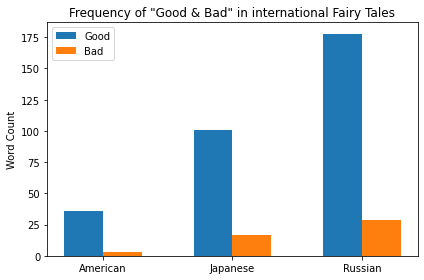

In [15]:
import matplotlib.pyplot as plt

x = np.arange(len(titles))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, good_counts, width, label='Good')
rects2 = ax.bar(x + width/2, bad_counts, width, label='Bad')

ax.set_ylabel('Word Count')
ax.set_title('Frequency of "Good & Bad" in international Fairy Tales')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()

# Step Five: Calculate the Euclidean distance between the documents, using two key words as the point of comparison

In [19]:
#define the terms for each array

american = np.array([good_counts[0], bad_counts[0]])
japanese = np.array([good_counts[1], bad_counts[1]])
russian = np.array([good_counts[2], bad_counts[2]])

In [21]:
def euclidean_distance(a, b):
    """Compute the Euclidean distance between two vectors.

    Note: ``numpy.linalg.norm(a - b)`` performs the
    same calculation using a slightly faster method.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        float: The euclidean distance between vector a and b.

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(euclidean_distance(a, b), 2)
        3.87

    """
    return np.sqrt(np.sum((a - b) ** 2))

americanjapanese = euclidean_distance(american, japanese)
print(f'American - Japanese: {americanjapanese:.2f}')

americanrussian = euclidean_distance(american, russian)
print(f'American - Russian: {americanrussian:.2f}')

japaneserussian = euclidean_distance(japanese, russian)
print(f'Jananese - Russian: {japaneserussian:.2f}')


American - Japanese: 66.49
American - Russian: 144.36
Jananese - Russian: 77.93
